# Machine Learning Assessment

***

## Overview of Sci-kit Learn:

SciKit-Learn is a free software machine-Learning, Python library. It was initially developed as a summer code project by French Data Scientist David Cournapeau in 2007 [1]. The first public release of Scikit-Learn was in January 2010. Scikit-Learn provides a wide variety of helpful tools for machine Learning and statistical modelling including classification, regression, clustering models and dimensionality reduction via a python interface such as commander or Visual Studio Code. The library is built on SciPy (scientific python), NumPy (numeric python), pandas (analysing datasets), matplotlib (plotting library). The Scikit learn library is focussed on modelling data [2] and uses these other libraries to load, manipulate and summarize data.

Some of the most common models produced by the Sci-kit learn library include:
- Supervised Learning 
An algorithm is trained on a labelled dataset. The algorithm uses the results to clasify data and make accurate predictions based om the data. Supervised learning is classified into 2 types.
    - Classification belongs to two or more classes and we want to predict the unlabelled data from already labelled data.
    - Regression, consists of one or more continuous variables.
- Unsupervised Learning algorithms As the name suggest the models are not sepervised. Instead the model finds the underlying structure of the dataset according to similarities or trends in the data [3]
- Clustering grouping the data points into different clusters whichare similar
- Cross Validation which is used to assess a machine learning model and test its accuracy. [4]
- Feature extraction for defining attributes in images and text data

Other models include Dimensionality reduction, Ensemble methods, Parameter tuning and Datasets


## Demo of three Sci-kit-learn algorithms

### Nearest Neighbors

The nearest neighbor algorithm can be used in both supervised and unsupervised data modelling. In supervised learning the KNN algorithm is used for
both classification and regression methods. In the KNN supervised machione learning the model learns from the data that is already labelled within the model. 
The model then uses the labelled data as input objects so it can make predictions on data which is unseen.
KNN works by taking each data point and looking for its closest labelled data point. The data point is then assigned a label based upon the cluster of data points 
that are in the majority in the vicinity.
To demonstrate the KNN algorithm i have selected the pima indian diabetes dataset.

#### Description of dataset:

The dataset consists of 768 records and 9 variables 8 of the variables are medical predictor input variables (pregnancies, BMI, Insulin etc.) and 
one target output variable (outcome) which predicts whether the patient is likely to have diabetes based upon the 8 medical input variables. 
The data subjects were women who were at least 21 years old, of Pima Indian heritage and living near Phoenix, Arizona. The data were collected by 
the US National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a 
patient may have diabetes [5].

In [1]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import numpy as np
import seaborn as sns
import pandas as pd

#### Load the dataset

First step is to load the diabetes dataset into the model using Pandas and to ensure the data has been loaded properly. I then call the shape function 
on the dataframe to get a count of the numbers of records and variables in the dataset. Describe function displays a statistical summaryu of the dataset
(count, mean, max, min etc.)

In [2]:
# load the data using pandas
df = pd.read_csv("data\diabetes.csv")

# display the attributes
print (df.keys())

# displays number of records and variables
print (df.shape)

# get a statistical view of the dataset
df.describe()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681576,72.250000,26.743490,118.757812,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.117203,9.546733,93.039581,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.000000,80.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,80.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In the original diabetes dataset the minimum values of variables Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin and BMI are listed as 0. 
It is expected that the pregnancies variable could be zero however the other 5 variables the value zero is unexpected and does not make any sense so 
this would suggest that the zero values are missing data for those variables. The data needs to be cleansed accordingly. Below are the problem records - 
376 in total. Reference [6] and [7] suggests that the zero values should be replaced with non-zero values such as the mean for that particular column.

#### Plot the amended dataset

Pairplot funtion from the seaborn library is used to plot all 5 input variables aginst each other. It will also help to decide which variables to 
use in the KNN demo as there are too many variables and plots are too complex to select 5 variables. Hue tells seaborn to use outcome columnto colour 
the dots and diffrentiate between daibetes patients and non-diabetes patients.

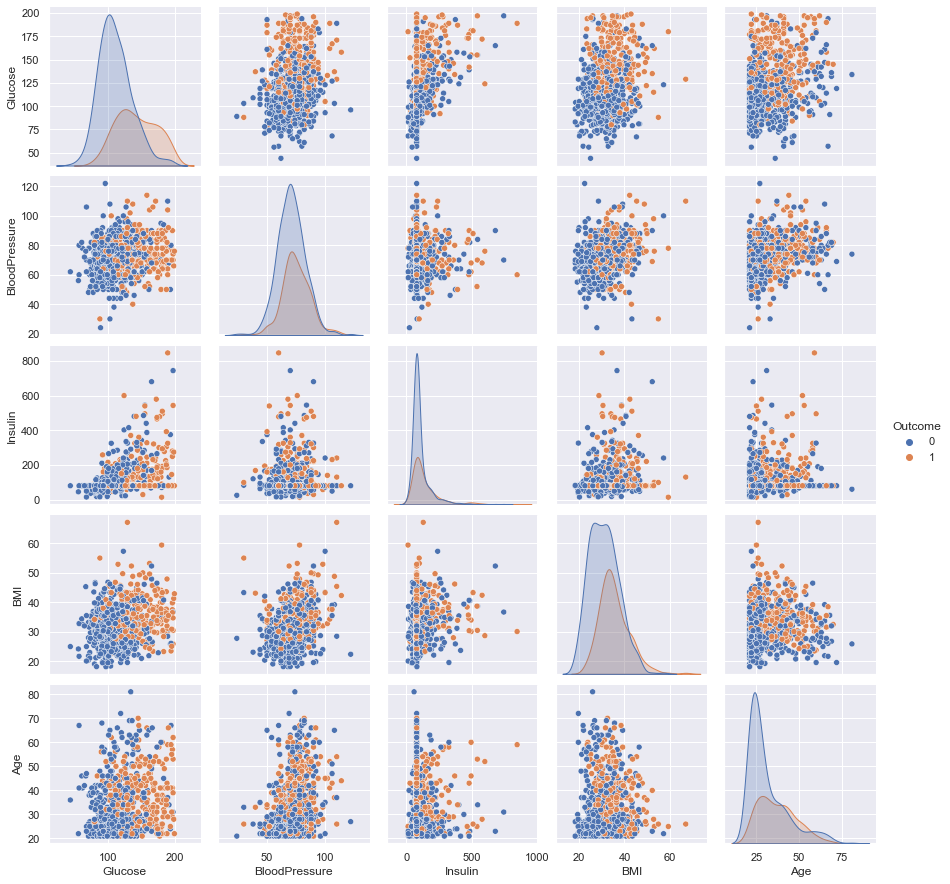

In [3]:
# select 5 input variables
graph = ['Glucose', 'BloodPressure', 'Insulin','BMI','Age','Outcome']
sns.set()

# run seaborn pairplot and colour the outcome variable
print(sns.pairplot(df[graph],hue='Outcome', diag_kind='kde'))

From analysing the plots of the 5 input variables Glucose is the variable which has the most obvious pattern. The higher the Glucose levels in the 
body the more likely the patient will have diabetes. I have also selected age and BMI as diabetes is more prevelant in patients with a higher BMI and 
who have an older age profile.

In [4]:
# select 3 input variables
cols = ['Glucose','BMI','Age','Outcome']

# reset dataframe to the 3 variables selected
df = df[cols]
print(df.head(5))

   Glucose   BMI  Age  Outcome
0    148.0  33.6   50        1
1     85.0  26.6   31        0
2    183.0  23.3   32        1
3     89.0  28.1   21        0
4    137.0  43.1   33        1


#### Split the dataset

Next step is to split the dataset using train_test_split function from the sklearn model_selection module. The train, test functionality splits 
the dataset randomly into 2 groups 75% to train and 25% to test (unless otherwise specified by train_size in the statement). The inputs are the medical 
predictor variables such as BMI, age and Gand the output is the Outcome variable which is the prediction of whether the patient has diabetes based 
upon th medical input variables.

In [5]:
# split the data into training and testing datasets using train_test_split function
train, test = train_test_split(df)

X_train = train[['Glucose','BMI','Age']]
y_train = train['Outcome']
X_test = test[['Glucose','BMI','Age']]
y_test = test['Outcome']

# display the resulting count of each dataset
a = len(X_train) 
b = len(X_test)

# print results
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 576 
 Testing data = 192 
 Total data length =  768


#### Using Neighbours classifier

In [6]:
# set test and train score to blank array
test_scores = []
train_scores = []

# loop through k values
for i in range(1,100):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    # calculate model accurcy and save in variables
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [7]:
# get the maximum train score and print out
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

# print results
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [8]:
# get the maximum test score and print out
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]

# print results
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.04166666666666 % and k = [77, 78, 80, 81, 82, 83]


C:\Users\Noel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Noel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


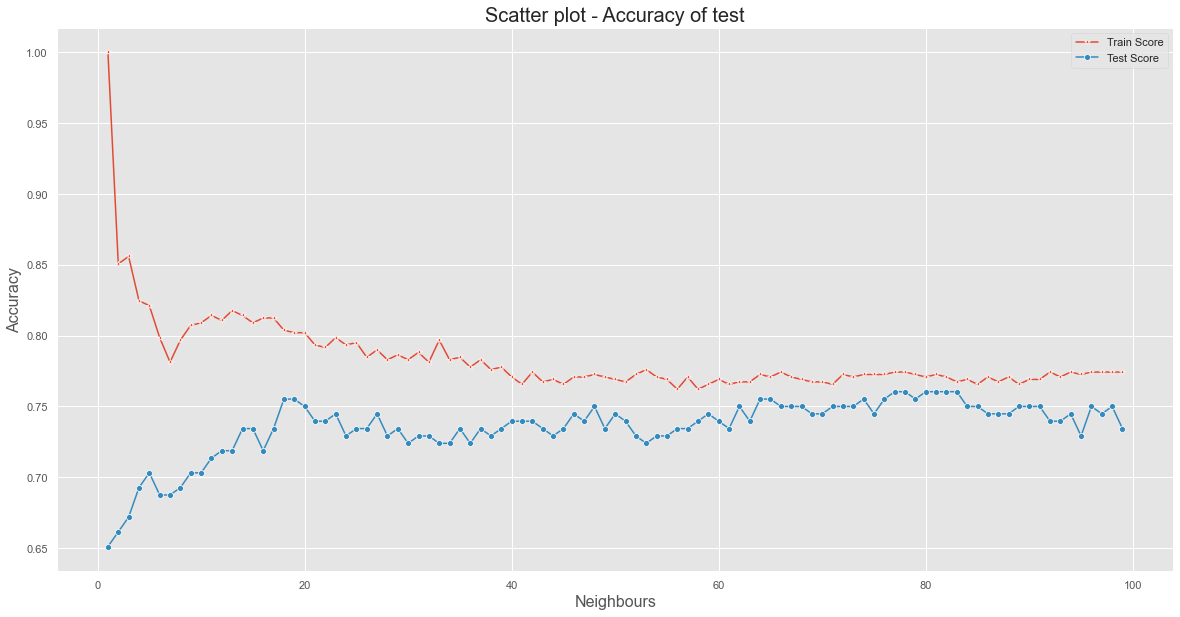

In [9]:
# make plot bigger and tidier
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (20,10)

# use lineplot to display data
p = sns.lineplot(range(1,100),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),test_scores,marker='o',label='Test Score')

# display xlabel, ylabel and title on scatter plot
plt.xlabel('Neighbours', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Scatter plot - Accuracy of test',fontsize=20)
plt.show()

The most accurate result is 79.16% captured at 8 points. These will be used in the final model to predict the outcome of the patient based on the 
variables Glucose, BMI and Age.
***

### Linear Regression

Linear regression is used to predict the relationship between two variables by applying a linear equation to the data. The linear equation is represented by
(y=mx+c) and based on that values can be predicted for any given input. There are two types of variable, one variable is called an independent variable 
where the data is known, and the other is a dependent variable where the value depends on changes in the value of the independent variable.  In summary 
Linear Regression examines whether a set of predictor variables do a good job in predicting an outcome of the dependent variable. An example of Linear Regresion 
is the relationship between height abd weight of a person. As the height of a person increases so too does weight.

#### Description of dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the 
StatLib archive.  There are 506 rows and 13 variables in this dataset. The objective is to predict the value of prices of the house using the 
given variables.

In [10]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import numpy as np
import seaborn as sns
import pandas as pd

#### Load the dataset

In [11]:
# load the data using pandas
df = pd.read_csv("data\housing.csv")

# display the attributes
print ('Field Names =', df.keys())

# displays number of records and variables
print (df.shape)

# get a statistical view of the dataset
df.describe()

Field Names = Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Plot of target (price) values in dataset

Below i explore the price column to view the range of distribution of prices in the dataset. The data for house prices follows the normal distribution 
whereby most of the house prices between 20 and 24 range. There are some outliers either side with about 15 expensive houses at the price value of 50. 
The price scale is $1000.

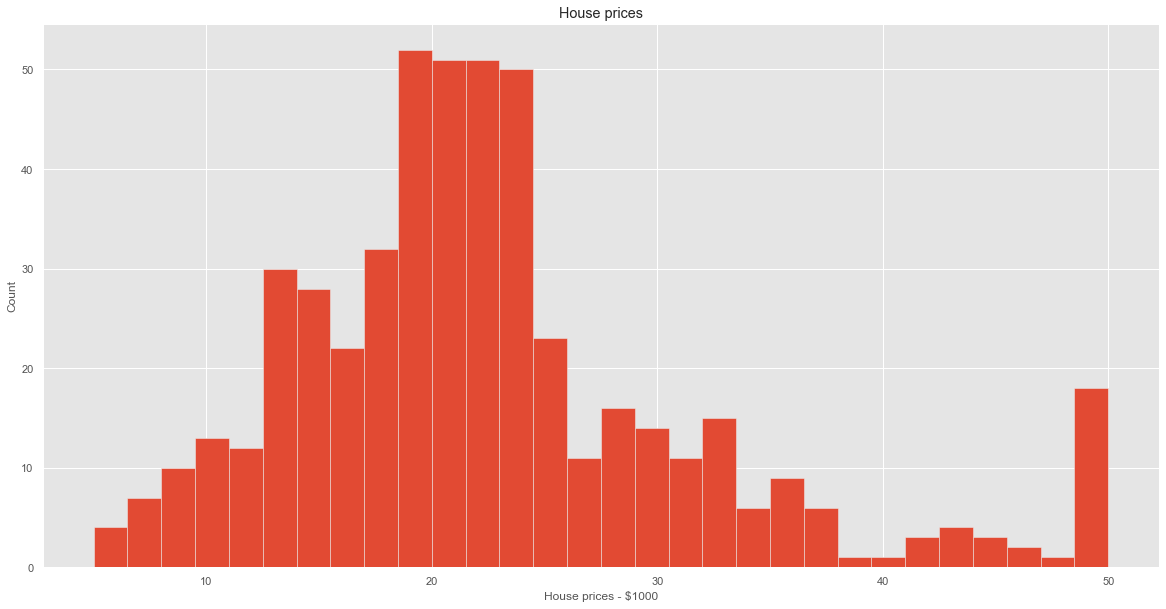

In [12]:
# # make plot bigger and tidier
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (20,10)

# display histogram of house prices
plt.hist(df['MEDV'], bins=30)

# display xlabel, ylabel and title on histogram
plt.ylabel("Count")
plt.xlabel("House prices - $1000")
plt.title("House prices")
plt.show()

#### Correlation mtrix to select most suitable predictor varaibles

Blog [10] suggests a correlation matrix should be completed in order to measure the linear relationships between the variables using the corr function.
The heatmap function from the seaborn library plots the correlation matrix below. If the value is close to 1, it means that there is a strong positive 
correlation between the two variables. When it is close to -1, the variables have a strong correlation. For a linear regression model to fit 
the predictor attributes which have a high postive correlation with the target variable should be selected. In this instance RM (0.7), LSTAT (-0.74) and
are selected. Other such as ZN (0.36) and Age (-0.38) do not have a high correlation with MEDV and dont have as much impact as the 2 selected variables 
on the Boston house prices.

<AxesSubplot:>

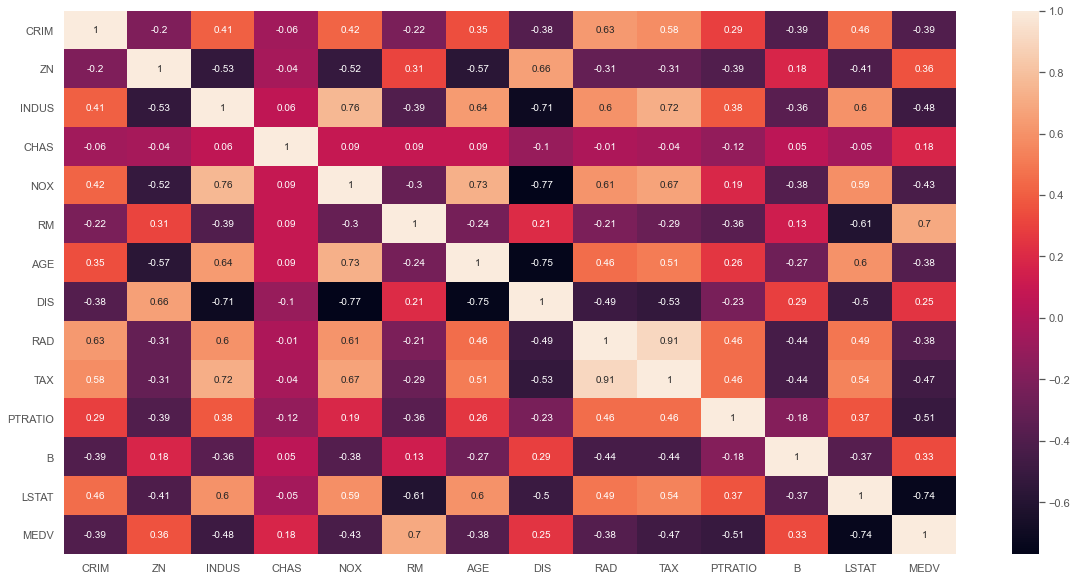

In [13]:
# display correlation matrix
correlation_matrix = df.corr().round(2)

# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The 2 plots below have a linear relationship. LSTAT has a negative linear relationship with the house prices. The prices tend to decrease with an 
increase in LSTAT wheras the prices increase with an increase in RM so an increase in th number of rooms in a dwelling increases the price of a 
house as you expect.

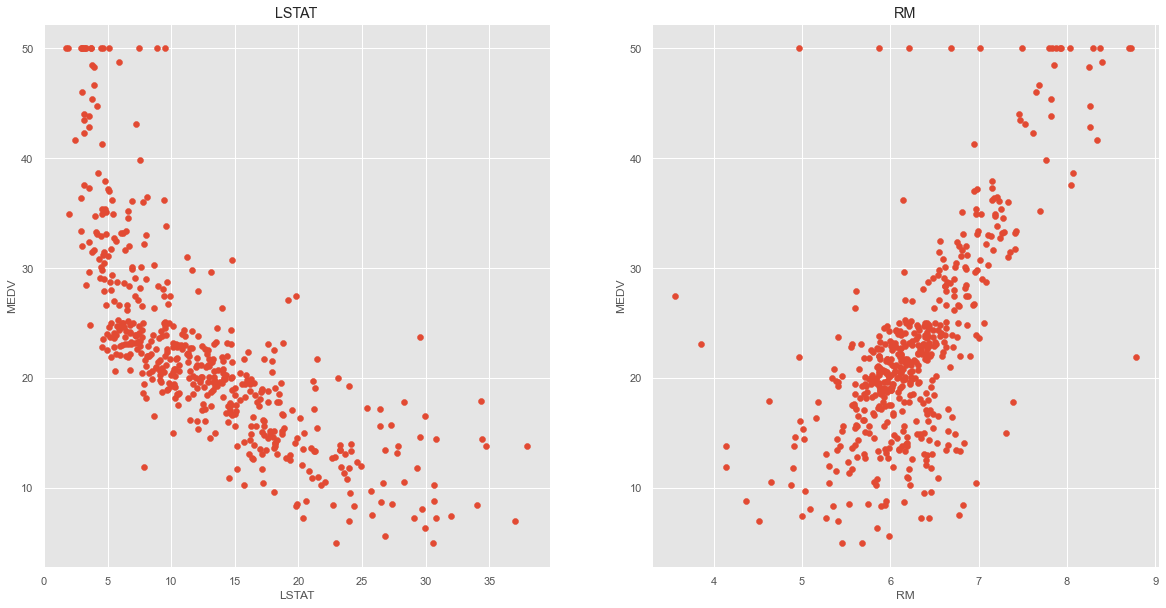

In [14]:
# set features and target varaibles
features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    
    # display xlabel, ylabel and title on scatter plot
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#### Split the dataset

Split the data into training and testing sets using train_test_split functionality from Sci-kit learn. We use the default split of 75% training 
and 25% of testing. This splits the 2 sets of data into 404 rows for training and 102 for testing.

In [15]:
columns = ['LSTAT','RM']

# concatenate field LSTAT, RM using np.c
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']])
Y = df['MEDV']

In [16]:
# split dataset in test and teain models
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=5)

# display the resulting count of each dataset
a = len(X_train) 
b = len(X_test)

# print results
print(' Training data =',a,'\n','Testing data =',b,'\n','Total data length = ',a+b)

 Training data = 404 
 Testing data = 102 
 Total data length =  506


#### Linear Regression on both training and test datasets (from blog [10})

The LinearRegression package from sci-kit learn is used to train the model on both training and test data [10].

In [17]:
# train models usinG LR on both train and test
lr = LinearRegression()
lr.fit(X_train,Y_train)

y_pred = lr.predict(X_test)

Run a scatter plot to display the predicted model.

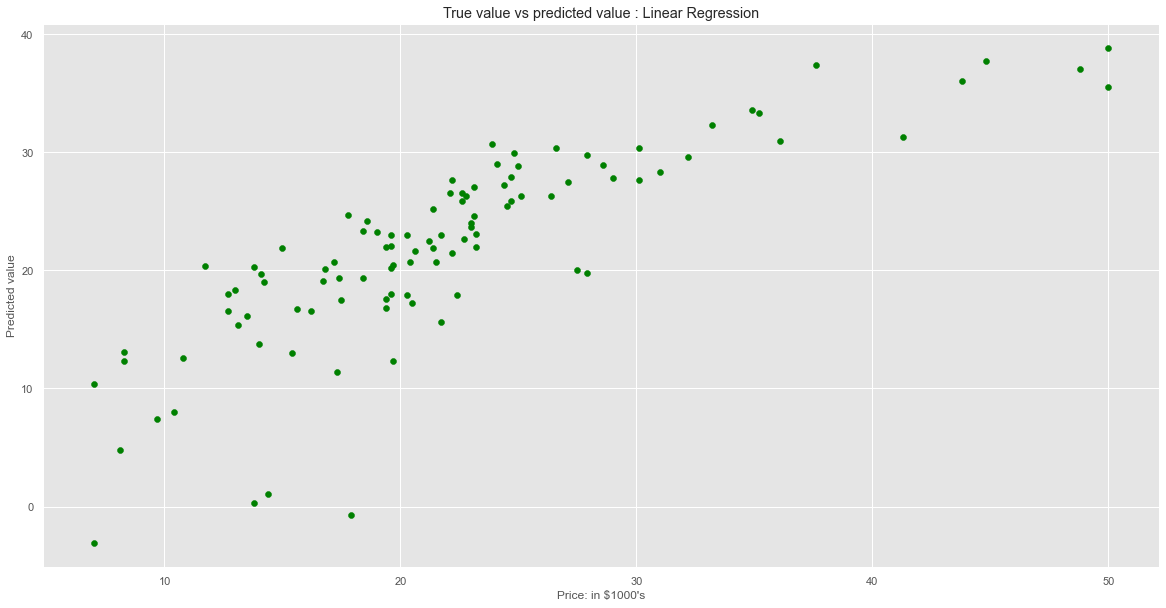

In [18]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, y_pred, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

#### Results of Linear Regression

Root Mean Squared Error (RMSE), the Mean Squared error (MSE) and the Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model and tell us how 
accurate the model is. Using the mean squared error functionality the results of the linear regression are displayed [12]. There is an Mean square error rate 
of 34.53% which gives an accuracy value of 65.47% which is not a very accurate model for determining Boston house prices. Also the lower the MAE and RMSE error 
value the better and more accurate the model. One could improve the result by selecting one variable only or excluding the outliers which may be errored information
provided in the survey.

In [19]:
# results of Linear Regression

print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 3.791310213343105
MSE: 26.392886822666096
RMSE: 5.137400784702912


The intercept of -3.69 is the value at which the regression line interceopts the y axis. 
The coefficient values are estimates of the unknown population parameters [13] and describe the relationship between a predictor variable and the response. 
In linear regression, coefficients are the values that multiply the predictor values. The negative value for LSTAT indictes the the target value of house 
price decrease whereas the house price increases for RM. The coefficient value represents the mean change in the house price given a unit change in RM or 
LSTAT variables. So for every unit change in the RM or LSTAT results in an increase in the mean price value of +5.4 and -0.62 repectively.


In [20]:
# print the intercept
print(lr.intercept_)

#Coefficients
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

2.736240342606635


,Coefficient
0,-0.717230
1,4.589388


***

### Random Forest

The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression, and other tasks using decision 
trees. The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set [14]. It is basically a set of decision 
trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.
In this classification algorithm, we will use IRIS flower datasets to train and test the model. We will build a model to classify the type of flower.

#### Description of dataset

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [21]:
# import libraries

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

#### Load the Iris dataset

In [22]:
# load the data using pandas
df = pd.read_csv("data\iris.csv")

# display the attributes
print (df.keys())

# displays number of records and variables
print (df.shape)

# get a statistical view of the dataset
df.describe()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Below is a test to view if there are any missing or null values in the dataset that may cause an issue with the model prediction. As can be seen from the result 
below all attributes fields have been populated so no updates are required for the dataset.

In [23]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Run a pairplot from the seaborn library to view the correlation between the predictor variables (petal width, petal length, sepal width, sepal length)
for the 3 species of Iris flower. The plot is coloured by species to view the differences between the 3 species based upon the 4 variables. 
From the graphs the Iris Setosa species is much different from both Versicolor and Virginica. The Petal Width and Petal length are much smaller than the 
other 2 species. The Sepal width is bigger than Versicolor and Virginica but there is some overlap. There is not as much seperation between the other two 
species with a lot of overlapping observed.

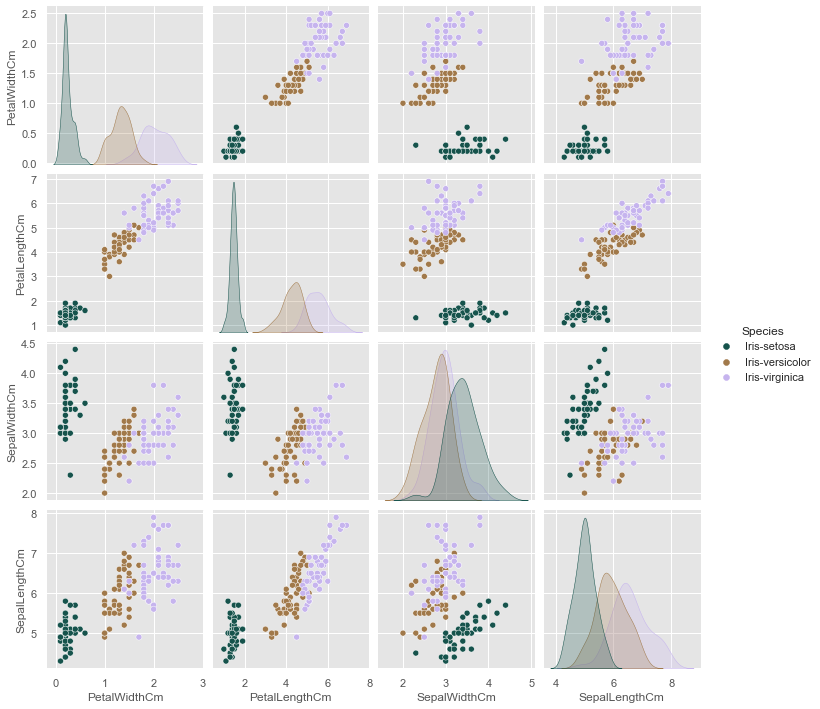

In [24]:
# select the variables to be plotted
data = ['PetalWidthCm', 'PetalLengthCm', 'SepalWidthCm','SepalLengthCm', 'Species']

# use seaborn pairplot and diffrentiate by species
sns.pairplot(df[data], hue="Species", palette="cubehelix")

View the differences between the 3 species of Iris flower by creating a violin plot.

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

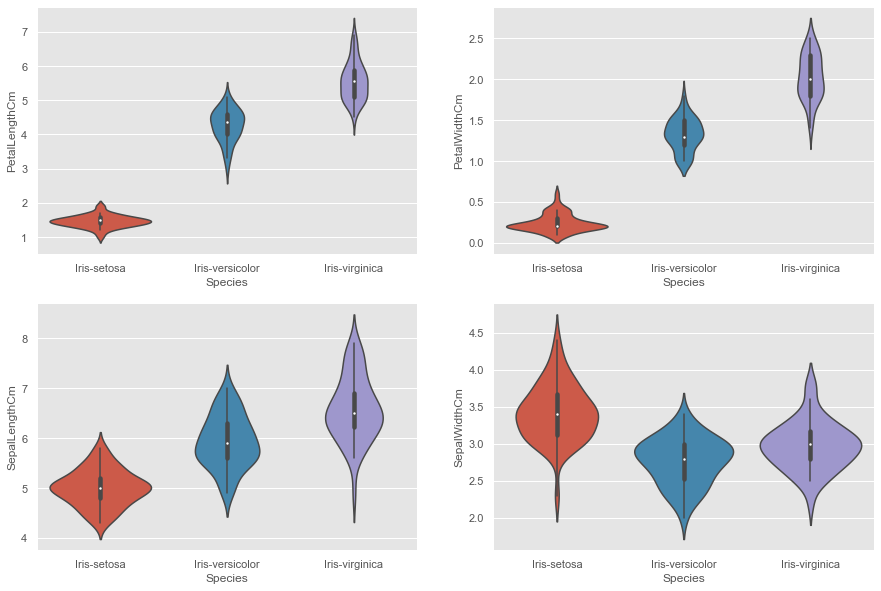

In [25]:
# make plot bigger
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
# Run a violin plot to view
sns.violinplot(x='Species',y='PetalLengthCm',data = df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data = df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
#fig.savefig("variable with species.png")

#### Split the dataset

Split the data into training and testing sets using train_test_split functionality from Sci-kit learn. I use the default split of 70% training and 30% of testing. This splits the 2 
sets of data into 105 rows for training and 45 for testing.

In [26]:

X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y=df['Species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# X_train contains 70% of total dataset
print(X_train.shape)

# X_test contains 30% of total dataset
print(X_test.shape)

(105, 4)
(45, 4)


#### Random forest on both train and test (from blog [15])

In [27]:
# create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Attains an accuracy level of 0.93

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


## References:

[1] - Wikipedia, scikit-learn; https://en.wikipedia.org/wiki/Scikit-learn

[2] - A Gentle Introduction to Scikit-Learn: A Python Machine Learning Library; https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/

[3] - Unsupervised Machine Learning; https://www.javatpoint.com/unsupervised-machine-learning

[4] - What Is Cross-Validation? Comparing Machine Learning Models; https://learn.g2.com/cross-validation

[5] - Pima Indians Diabetes Database; https://data.world/data-society/pima-indians-diabetes-database

[6] - Diabetes prediction system with KNN algorithm; https://medium.com/codex/diabetes-predication-system-with-knn-algorithm-e040999229f7

[7] - How To Predict Diabetes using K-Nearest Neighbor; https://mrdatascience.com/how-to-predict-diabetes-using-k-nearest-neighbor/

[8] - sklearn.model_selection.train_test_split; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[9] - Step by Step Diabetes Classification-KNN-detailed; https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

[10] - Linear Regression on Boston Housing Dataset; https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[11] - ML | Boston Housing Kaggle Challenge with Linear Regression; https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/

[12] - Linear-Regression-with-Boston-Housing-Dataset; https://github.com/meenuagarwal/Linear-Regression-with-Boston-Housing-Dataset/blob/master/LR.ipynb

[13] - Regression coefficients; https://statisticsbyjim.com/glossary/regression-coefficient/

[14] - Random Forest Classifier using Scikit-learn; https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

[15] - Simple Random Forest - Iris Dataset; https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset

***
### End